# ML Project: COVID-19 Spreading Speed Prediction.
Fall Semester 2020/2021

## Author: Ahmad Arrabi                                                                                                              
ID: 20170534

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Preprocessing and Data Cleaning

Load the dataset that was created previously

In [2]:
countries_data=pd.read_csv('5%.csv')
countries_data.drop('index',axis='columns', inplace=True)
countries_data

,Country,Population,Density,Date to reach 1%,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,hospital_beds_per_thousand,...,Climate,Tourism,Date_FirstConfirmedCase,Latitude,Longtitude,Lockdown_Date,Lockdown_Type,GDP 2018,HF score 2017,literacy rate
0,Andorra,77287,164,2020-10-23,4038.0,85772.0,6.4,NaN,0.858,NaN,...,3.0,3042000,2020-03-03,42.546245,1.601554,2020-03-16,Full,NaN,NaN,NaN
1,Armenia,2964219,104,2020-12-13,148325.0,NaN,NaN,1.8,0.755,4.200,...,4.0,1652000,2020-03-02,40.069099,45.038189,2020-03-24,Full,10343.17559,7.42,99.8
2,Bahrain,1711057,2239,2020-11-21,85591.0,1954535.0,21.4,NaN,0.846,2.000,...,1.0,12045000,2020-02-25,25.930414,50.637772,2020-02-25,Full,47303.04851,6.63,95.7
3,Belgium,11598451,383,2020-12-02,582252.0,6013175.0,11.2,0.2,0.916,5.640,...,3.0,9119000,2020-02-05,50.503887,4.469936,2020-03-17,Full,51407.99834,8.29,NaN
4,Croatia,4100719,73,2020-12-28,205246.0,996935.0,4.3,0.7,0.831,5.540,...,3.0,16645000,2020-02-26,45.100000,15.200000,2020-03-22,Partial,27579.78083,7.86,99.3
5,France,65298930,119,2021-02-02,3283645.0,NaN,15.2,NaN,0.901,5.980,...,4.0,89322000,2020-01-25,46.227638,2.213749,2020-03-16,Full,45342.39574,8.02,NaN
6,Georgia,3987805,57,2020-12-17,201368.0,NaN,NaN,4.2,0.780,2.600,...,3.0,4757000,2020-02-27,42.315407,43.356892,2020-03-22,Partial,12004.57383,7.74,99.8
7,Israel,8678517,400,2021-01-02,434799.0,8562855.0,9.7,0.5,0.903,2.990,...,3.0,4121000,2020-02-22,31.046051,34.851612,2020-03-12,Full,39919.16965,7.61,NaN
8,Liechtenstein,38147,238,2020-12-24,1920.0,NaN,NaN,NaN,0.916,2.397,...,4.0,85300,2020-03-05,47.166000,9.555373,NaN,NaN,NaN,NaN,NaN
9,Lithuania,2715340,43,2020-12-30,139487.0,1629505.0,3.7,0.7,0.858,6.560,...,NaN,2825000,2020-02-29,55.169438,23.881275,2020-03-16,Full,35461.35910,8.32,99.8


In [3]:
countries_data = countries_data.drop('mortality_rate',axis='columns')

In [4]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     23 non-null     object 
 1   Population                  23 non-null     int64  
 2   Density                     23 non-null     int64  
 3   Date to reach 1%            23 non-null     object 
 4   total_cases                 23 non-null     float64
 5   total_tests                 16 non-null     float64
 6   tests_per_case              18 non-null     float64
 7   extreme_poverty             14 non-null     float64
 8   human_development_index     22 non-null     float64
 9   hospital_beds_per_thousand  22 non-null     float64
 10  handwashing_facilities      1 non-null      float64
 11  continent                   23 non-null     object 
 12  reproduction_rate           22 non-null     float64
 13  total_deaths                23 non-nu

### Preparing Data for ML Model

Notice that the feature 'Date' is considered an object so change it to datetime data type. 

Change population and density to float as they are considered integers.

In [5]:
countries_data['Date to reach 1%']=countries_data['Date to reach 1%'].apply(pd.to_datetime)
countries_data['Date_FirstConfirmedCase']=countries_data['Date_FirstConfirmedCase'].apply(pd.to_datetime)
countries_data['Lockdown_Date']=countries_data['Lockdown_Date'].apply(pd.to_datetime)
countries_data['Population']=countries_data['Population'].astype(float)
countries_data['Density']=countries_data['Density'].astype(float)

Calculate both time for spread and time for lockdown:
    $$T_{spread} = Date_{covid\ cases\ reach\  1\%\ population} -Date_{first\ covid \ case}$$
    $$T_{lockdown} = Date_{lockdown} -Date_{first\ covid \ case}$$
 Then, change the data type to datetime

In [6]:
time_for_spread=countries_data['Date to reach 1%']-countries_data['Date_FirstConfirmedCase']
countries_data['time for spread']=time_for_spread
countries_data['time for spread']=countries_data['time for spread'].astype('timedelta64[D]')

time_for_lockdown=countries_data['Lockdown_Date']-countries_data['Date_FirstConfirmedCase']
countries_data['time for lockdown']=time_for_lockdown
countries_data['time for lockdown']=countries_data['time for lockdown'].astype('timedelta64[D]')
countries_data.drop('Lockdown_Date',axis='columns', inplace=True) #we don't need lockdown date now
countries_data.drop('Date to reach 1%',axis='columns', inplace=True)
countries_data.drop('Date_FirstConfirmedCase',axis='columns', inplace=True)

In [7]:
countries_data.loc[countries_data['time for lockdown']<0]['time for lockdown']

Series([], Name: time for lockdown, dtype: float64)

In [8]:
#countries_data.loc[[0], 'time for lockdown']=0          #2% 
#countries_data.loc[[0,46,57], 'time for lockdown']=0   #1%
#comment all in 5%

In [9]:
countries_data.loc[countries_data['time for lockdown']<0]['time for lockdown']

Series([], Name: time for lockdown, dtype: float64)

In [10]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     23 non-null     object 
 1   Population                  23 non-null     float64
 2   Density                     23 non-null     float64
 3   total_cases                 23 non-null     float64
 4   total_tests                 16 non-null     float64
 5   tests_per_case              18 non-null     float64
 6   extreme_poverty             14 non-null     float64
 7   human_development_index     22 non-null     float64
 8   hospital_beds_per_thousand  22 non-null     float64
 9   handwashing_facilities      1 non-null      float64
 10  continent                   23 non-null     object 
 11  reproduction_rate           22 non-null     float64
 12  total_deaths                23 non-null     float64
 13  positive_rate               18 non-nu

### Dealing with NULL values

Drop 'handwashing facilities' feature as it's mostly NULL values.

In [11]:
countries_data.drop('handwashing_facilities',axis='columns', inplace=True)

We calculated the mean of each feature based on the continent of the country. Then, filled the NULL values with these averages.   

In [12]:
continent_mean=countries_data.groupby(['continent']).mean()
continent_mean

,Population,Density,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,hospital_beds_per_thousand,reproduction_rate,total_deaths,positive_rate,Climate,Tourism,Latitude,Longtitude,GDP 2018,HF score 2017,literacy rate,time for spread,time for lockdown
continent,,,,,,,,,,,,,,,,,,,,
Asia,4.046176e+06,609.6,202945.40,3.924862e+06,15.066667,2.166667,0.8280,2.5980,0.872000,1682.800,0.036667,2.400000,4878860.00,32.943159,45.013670,47293.678696,7.110000,98.275,294.8000,15.000000
Europe,1.550079e+07,201.0,780541.25,1.037417e+07,8.107692,0.555556,0.8908,4.1172,0.922667,17745.125,0.081769,3.142857,18781206.25,47.728208,7.914483,49400.576336,8.240769,98.500,305.3125,23.928571
North America,1.678337e+08,47.0,8409016.00,1.124324e+08,5.050000,1.700000,0.8565,2.5350,0.860000,152327.000,0.105000,2.500000,40765460.00,22.814111,-88.247509,44174.141180,8.075000,95.000,282.5000,13.500000


Countries that have the value 'Oceania' as their continent are nearly all NULL values. We dropped them by locating their index.

In [13]:
countries_data.loc[countries_data['continent']=='Oceania']

,Country,Population,Density,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,hospital_beds_per_thousand,continent,...,Climate,Tourism,Latitude,Longtitude,Lockdown_Type,GDP 2018,HF score 2017,literacy rate,time for spread,time for lockdown


In [14]:
#countries_data=countries_data.drop([24,28]) #2 instances with nearly all NAN values #comment when using 2%

In [15]:
#Africa=countries_data.loc[countries_data['continent']=='Africa']
Asia=countries_data.loc[countries_data['continent']=='Asia']
Europe=countries_data.loc[countries_data['continent']=='Europe']
North_America=countries_data.loc[countries_data['continent']=='North America']
#South_America=countries_data.loc[countries_data['continent']=='South America']

#Africa=Africa.fillna(value=continent_mean.loc['Africa'], axis=None, inplace=False, limit=None, downcast=None)
Asia=Asia.fillna(value=continent_mean.loc['Asia'], axis=None, inplace=False, limit=None, downcast=None)
Europe=Europe.fillna(value=continent_mean.loc['Europe'], axis=None, inplace=False, limit=None, downcast=None)
North_America=North_America.fillna(value=continent_mean.loc['North America'], axis=None, inplace=False, limit=None, downcast=None)
#South_America=South_America.fillna(value=continent_mean.loc['South America'], axis=None, inplace=False, limit=None, downcast=None)

We still have categorical null values (Lockdown Type), so we'll fill it with the most frequent value of each continent. 

In [16]:
print("North America:\n",North_America['Lockdown_Type'].value_counts(), "\n \nEurope:\n",Europe['Lockdown_Type'].value_counts())
print("Asia:\n",Asia['Lockdown_Type'].value_counts())
#print("South America:\n",South_America['Lockdown_Type'].value_counts())

North America:
 Partial    1
Full       1
Name: Lockdown_Type, dtype: int64 
 
Europe:
 Full       13
Partial     1
Name: Lockdown_Type, dtype: int64
Asia:
 Full       4
Partial    1
Name: Lockdown_Type, dtype: int64


In [17]:
North_America['Lockdown_Type']=North_America['Lockdown_Type'].fillna('Full')
Europe['Lockdown_Type']=Europe['Lockdown_Type'].fillna('Full')
Asia['Lockdown_Type']=Asia['Lockdown_Type'].fillna('Full')
#South_America['Lockdown_Type']=South_America['Lockdown_Type'].fillna('Full')
#Africa['Lockdown_Type']=Africa['Lockdown_Type'].fillna('Full')

Concatenate the continents subsets to get the new full dataset with no NULL values

In [18]:
#countries_data=pd.concat([Africa, Asia,Europe,North_America,South_America], sort=False)
countries_data=pd.concat([Asia, Europe, North_America], sort=False)

Climate feature shouldn't have any fractions, only whole numbers (1 - 4), so we applied floor. 

In [19]:
countries_data['Climate']=countries_data['Climate'].apply(np.floor) 

No NULL values exist now !

In [20]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 22
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     23 non-null     object 
 1   Population                  23 non-null     float64
 2   Density                     23 non-null     float64
 3   total_cases                 23 non-null     float64
 4   total_tests                 23 non-null     float64
 5   tests_per_case              23 non-null     float64
 6   extreme_poverty             23 non-null     float64
 7   human_development_index     23 non-null     float64
 8   hospital_beds_per_thousand  23 non-null     float64
 9   continent                   23 non-null     object 
 10  reproduction_rate           23 non-null     float64
 11  total_deaths                23 non-null     float64
 12  positive_rate               23 non-null     float64
 13  Climate                     23 non-nu

In [21]:
import seaborn as sns

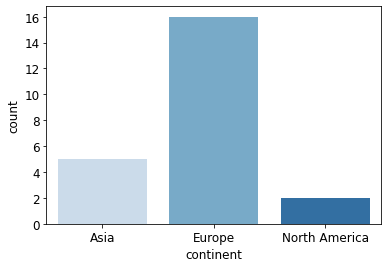

In [38]:
plt.figure()
sns.countplot(x='continent', data=countries_data, palette='Blues')
#plt.figsize=(7,5)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
#plt.show()

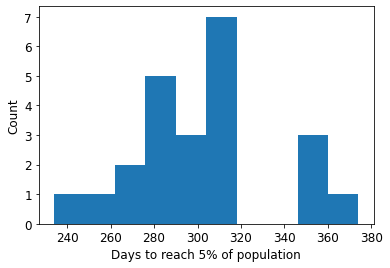

In [41]:
countries_data['time for spread'].hist()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.xlabel('Days to reach 5% of population')
plt.ylabel('Count')
plt.grid()
plt.show()

### Dealing With Categorical Data

Three categorical features exist in the dataset: climate, lockdown type, and continent.

We used one hot encoder to transform these features to numerical values.

In [24]:
countries_data=countries_data.reset_index()
countries_data.drop('index',axis='columns', inplace=True)

In [25]:
countries_data

,Country,Population,Density,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,hospital_beds_per_thousand,continent,...,Climate,Tourism,Latitude,Longtitude,Lockdown_Type,GDP 2018,HF score 2017,literacy rate,time for spread,time for lockdown
0,Armenia,2964219.0,104.0,148325.0,3.924862e+06,15.066667,1.800000,0.7550,4.2000,Asia,...,4.0,1652000,40.069099,45.038189,Full,10343.175590,7.420000,99.800,286.0,22.000000
1,Bahrain,1711057.0,2239.0,85591.0,1.954535e+06,21.400000,2.166667,0.8460,2.0000,Asia,...,1.0,12045000,25.930414,50.637772,Full,47303.048510,6.630000,95.700,270.0,0.000000
2,Georgia,3987805.0,57.0,201368.0,3.924862e+06,15.066667,4.200000,0.7800,2.6000,Asia,...,3.0,4757000,42.315407,43.356892,Partial,12004.573830,7.740000,99.800,294.0,24.000000
3,Israel,8678517.0,400.0,434799.0,8.562855e+06,9.700000,0.500000,0.9030,2.9900,Asia,...,3.0,4121000,31.046051,34.851612,Full,39919.169650,7.610000,98.275,315.0,19.000000
4,Qatar,2889284.0,248.0,144644.0,1.257197e+06,14.100000,2.166667,0.8560,1.2000,Asia,...,1.0,1819300,25.354826,51.183884,Full,126898.425900,6.150000,97.800,309.0,10.000000
5,Andorra,77287.0,164.0,4038.0,8.577200e+04,6.400000,0.555556,0.8580,4.1172,Europe,...,3.0,3042000,42.546245,1.601554,Full,49400.576336,8.240769,98.500,234.0,13.000000
6,Belgium,11598451.0,383.0,582252.0,6.013175e+06,11.200000,0.200000,0.9160,5.6400,Europe,...,3.0,9119000,50.503887,4.469936,Full,51407.998340,8.290000,98.500,301.0,41.000000
7,Croatia,4100719.0,73.0,205246.0,9.969350e+05,4.300000,0.700000,0.8310,5.5400,Europe,...,3.0,16645000,45.100000,15.200000,Partial,27579.780830,7.860000,99.300,306.0,25.000000
8,France,65298930.0,119.0,3283645.0,1.037417e+07,15.200000,0.555556,0.9010,5.9800,Europe,...,4.0,89322000,46.227638,2.213749,Full,45342.395740,8.020000,98.500,374.0,51.000000
9,Liechtenstein,38147.0,238.0,1920.0,1.037417e+07,8.107692,0.555556,0.9160,2.3970,Europe,...,4.0,85300,47.166000,9.555373,Full,49400.576336,8.240769,98.500,294.0,23.928571


In [26]:
#---------------------------------------------------------#
#climate
from sklearn.preprocessing import LabelBinarizer
climate = countries_data["Climate"]
encoder_climate = LabelBinarizer()
climate_1hot = encoder_climate.fit_transform(climate)

climate_1hot=pd.DataFrame(data=climate_1hot,columns=["Dry", "Wet tropical","humid subtropical","wet winters"])
countries_data= pd.concat([countries_data, climate_1hot], axis=1, sort=False)
countries_data.drop('Climate',axis='columns', inplace=True)
#----------------------------------------------------------#
#lockdown Type
from sklearn.preprocessing import LabelEncoder
encoder_lockdown = LabelEncoder()
lockdown = countries_data["Lockdown_Type"]
lockdown_encoded = encoder_lockdown.fit_transform(lockdown)

from sklearn.preprocessing import OneHotEncoder
encoder2 = OneHotEncoder(sparse=False)
lockdown_1hot = encoder2.fit_transform(lockdown_encoded.reshape(-1,1))

lockdown_1hot = pd.DataFrame(data=lockdown_1hot,columns=["Full lockdown", "Partial lockdown"])
countries_data= pd.concat([countries_data, lockdown_1hot], axis=1, sort=False)
countries_data.drop('Lockdown_Type',axis='columns', inplace=True)
#-----------------------------------------------------------#
#continent
encoder_continent = LabelEncoder()
continent = countries_data["continent"]
continent_encoded = encoder_continent.fit_transform(continent)

encoder2_continent = OneHotEncoder(sparse=False)
continent_1hot = encoder2_continent.fit_transform(continent_encoded.reshape(-1,1))

#continent_1hot = pd.DataFrame(data=continent_1hot,columns=["Africa","Asia","Europe","North America","South America"])
continent_1hot = pd.DataFrame(data=continent_1hot,columns=["Asia","Europe","North America"])
countries_data= pd.concat([countries_data, continent_1hot], axis=1, sort=False)
countries_data.drop('continent',axis='columns', inplace=True)

### Feature Scaling

In [27]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     23 non-null     object 
 1   Population                  23 non-null     float64
 2   Density                     23 non-null     float64
 3   total_cases                 23 non-null     float64
 4   total_tests                 23 non-null     float64
 5   tests_per_case              23 non-null     float64
 6   extreme_poverty             23 non-null     float64
 7   human_development_index     23 non-null     float64
 8   hospital_beds_per_thousand  23 non-null     float64
 9   reproduction_rate           23 non-null     float64
 10  total_deaths                23 non-null     float64
 11  positive_rate               23 non-null     float64
 12  Tourism                     23 non-null     int64  
 13  Latitude                    23 non-nu

View different options of scaling our data, we chose min max scaler.

Min Max scaling preserves the shape of the original distribution and doesn't reduce the importance of outliers.

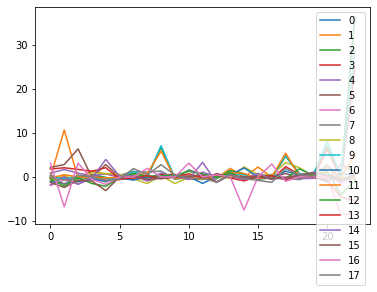

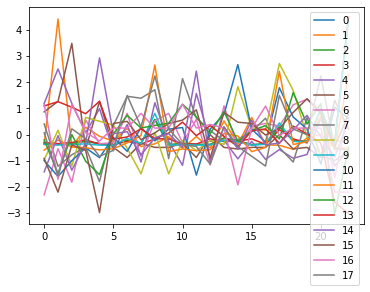

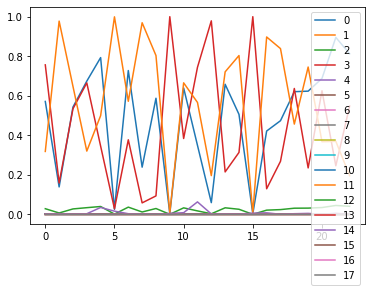

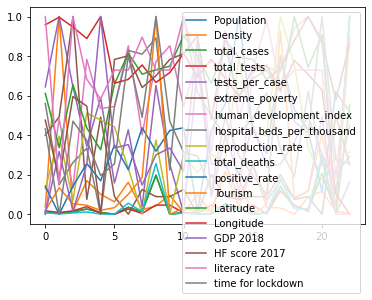

In [28]:
countries_data_categorical=countries_data.filter(items=['Country','Dry','Wet tropical','humid subtropical','wet winters','Full lockdown','Partial lockdown','Asia','Europe','North America'])
countries_data_numerical=countries_data.drop(['time for spread','Country','Dry','Wet tropical','humid subtropical','wet winters','Full lockdown','Partial lockdown','Asia','Europe','North America'],axis='columns',inplace=False)

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

scaled=RobustScaler().fit_transform(countries_data_numerical)
scaled2=StandardScaler().fit_transform(countries_data_numerical)
scaled3=Normalizer().fit_transform(countries_data_numerical)
scaled4=MinMaxScaler().fit_transform(countries_data_numerical)

scaled1_df=pd.DataFrame(data=scaled)
scaled2_df=pd.DataFrame(data=scaled2)
scaled3_df=pd.DataFrame(data=scaled3)
scaled4_df=pd.DataFrame(data=scaled4,columns=["Population",
                                              "Density",
                                              "total_cases",
                                              "total_tests",
                                              "tests_per_case",
                                              "extreme_poverty",
                                              "human_development_index",
                                              "hospital_beds_per_thousand",
                                              "reproduction_rate",
                                              "total_deaths",
                                              "positive_rate",
                                              "Tourism",
                                              "Latitude",
                                              "Longitude",
                                              "GDP 2018",
                                              "HF score 2017",
                                              "literacy rate",
                                              "time for lockdown"])

scaled1_df.plot() #RobustScaler
scaled2_df.plot() #StandardScaler
scaled3_df.plot() #Normalizer
scaled4_df.plot() #min max scaling

plt.show()

 Join the two dataframes by index to get the new scaled dataset.
 
 Add the target column as we dropped it before scaling.

In [29]:
time_for_spread=countries_data['time for spread']
#mortality_rate = countries_data['mortality_rate']

countries_data=scaled4_df.join(countries_data_categorical)
countries_data.insert(26,value=time_for_spread,column='time for spread')
#countries_data.insert(27,value=mortality_rate,column='mortality_rate')

countries_data.drop('Country',axis='columns', inplace=True)

countries_data

,Population,Density,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,hospital_beds_per_thousand,reproduction_rate,total_deaths,...,Dry,Wet tropical,humid subtropical,wet winters,Full lockdown,Partial lockdown,Asia,time for spread,Europe,North America
0,0.008845,0.035682,0.008832,0.017170,0.644195,0.400000,0.000000,0.559701,0.127907,0.008160,...,0,0,0,1,1.0,0.0,1.0,286.0,0.0,0.0
1,0.005062,1.000000,0.005053,0.008358,1.000000,0.491667,0.481481,0.149254,0.395349,0.001023,...,1,0,0,0,1.0,0.0,1.0,270.0,0.0,0.0
2,0.011934,0.014453,0.012028,0.017170,0.644195,1.000000,0.132275,0.261194,0.069767,0.006389,...,0,0,1,0,0.0,1.0,1.0,294.0,0.0,0.0
3,0.026092,0.169377,0.026091,0.037913,0.342697,0.075000,0.783069,0.333955,0.511628,0.011170,...,0,0,1,0,1.0,0.0,1.0,315.0,0.0,0.0
4,0.008618,0.100723,0.008611,0.005239,0.589888,0.491667,0.534392,0.000000,0.476744,0.000714,...,1,0,0,0,1.0,0.0,1.0,309.0,0.0,0.0
5,0.000131,0.062782,0.000140,0.000000,0.157303,0.088889,0.544974,0.544254,0.441860,0.000130,...,0,0,1,0,1.0,0.0,0.0,234.0,1.0,0.0
6,0.034906,0.161698,0.034974,0.026510,0.426966,0.000000,0.851852,0.828358,0.232558,0.056085,...,0,0,1,0,1.0,0.0,0.0,301.0,1.0,0.0
7,0.012275,0.021680,0.012262,0.004075,0.039326,0.125000,0.402116,0.809701,0.000000,0.012323,...,0,0,1,0,0.0,1.0,0.0,306.0,1.0,0.0
8,0.196992,0.042457,0.197717,0.046014,0.651685,0.088889,0.772487,0.891791,0.375194,0.256994,...,0,0,0,1,1.0,0.0,0.0,374.0,1.0,0.0
9,0.000013,0.096206,0.000012,0.046014,0.253241,0.088889,0.851852,0.223321,0.000000,0.000000,...,0,0,0,1,1.0,0.0,0.0,294.0,1.0,0.0


Notice that we don't need the country name anymore, it was used just as an index when joining dataframes.

In [30]:
x = countries_data.corr()
x["time for spread"].sort_values(ascending=False)

time for spread               1.000000
time for lockdown             0.756118
Tourism                       0.548128
human_development_index       0.369697
reproduction_rate             0.332031
Latitude                      0.276913
positive_rate                 0.239234
wet winters                   0.203171
Europe                        0.199672
HF score 2017                 0.184683
total_deaths                  0.145731
Full lockdown                 0.096376
literacy rate                 0.087256
total_cases                   0.080640
Population                    0.079642
Longitude                     0.024074
hospital_beds_per_thousand    0.017393
total_tests                   0.000079
GDP 2018                     -0.018195
tests_per_case               -0.030201
humid subtropical            -0.039023
Partial lockdown             -0.096376
Wet tropical                 -0.099224
Asia                         -0.101801
Dry                          -0.110210
North America            

In [31]:
countries_data

,Population,Density,total_cases,total_tests,tests_per_case,extreme_poverty,human_development_index,hospital_beds_per_thousand,reproduction_rate,total_deaths,...,Dry,Wet tropical,humid subtropical,wet winters,Full lockdown,Partial lockdown,Asia,time for spread,Europe,North America
0,0.008845,0.035682,0.008832,0.017170,0.644195,0.400000,0.000000,0.559701,0.127907,0.008160,...,0,0,0,1,1.0,0.0,1.0,286.0,0.0,0.0
1,0.005062,1.000000,0.005053,0.008358,1.000000,0.491667,0.481481,0.149254,0.395349,0.001023,...,1,0,0,0,1.0,0.0,1.0,270.0,0.0,0.0
2,0.011934,0.014453,0.012028,0.017170,0.644195,1.000000,0.132275,0.261194,0.069767,0.006389,...,0,0,1,0,0.0,1.0,1.0,294.0,0.0,0.0
3,0.026092,0.169377,0.026091,0.037913,0.342697,0.075000,0.783069,0.333955,0.511628,0.011170,...,0,0,1,0,1.0,0.0,1.0,315.0,0.0,0.0
4,0.008618,0.100723,0.008611,0.005239,0.589888,0.491667,0.534392,0.000000,0.476744,0.000714,...,1,0,0,0,1.0,0.0,1.0,309.0,0.0,0.0
5,0.000131,0.062782,0.000140,0.000000,0.157303,0.088889,0.544974,0.544254,0.441860,0.000130,...,0,0,1,0,1.0,0.0,0.0,234.0,1.0,0.0
6,0.034906,0.161698,0.034974,0.026510,0.426966,0.000000,0.851852,0.828358,0.232558,0.056085,...,0,0,1,0,1.0,0.0,0.0,301.0,1.0,0.0
7,0.012275,0.021680,0.012262,0.004075,0.039326,0.125000,0.402116,0.809701,0.000000,0.012323,...,0,0,1,0,0.0,1.0,0.0,306.0,1.0,0.0
8,0.196992,0.042457,0.197717,0.046014,0.651685,0.088889,0.772487,0.891791,0.375194,0.256994,...,0,0,0,1,1.0,0.0,0.0,374.0,1.0,0.0
9,0.000013,0.096206,0.000012,0.046014,0.253241,0.088889,0.851852,0.223321,0.000000,0.000000,...,0,0,0,1,1.0,0.0,0.0,294.0,1.0,0.0


In [33]:
corr_matrix = countries_data.corr()
corr_matrix["time for spread"].sort_values(ascending=False)

time for spread               1.000000
time for lockdown             0.756118
Tourism                       0.548128
human_development_index       0.369697
reproduction_rate             0.332031
Latitude                      0.276913
positive_rate                 0.239234
wet winters                   0.203171
Europe                        0.199672
HF score 2017                 0.184683
total_deaths                  0.145731
Full lockdown                 0.096376
literacy rate                 0.087256
total_cases                   0.080640
Population                    0.079642
Longitude                     0.024074
hospital_beds_per_thousand    0.017393
total_tests                   0.000079
GDP 2018                     -0.018195
tests_per_case               -0.030201
humid subtropical            -0.039023
Partial lockdown             -0.096376
Wet tropical                 -0.099224
Asia                         -0.101801
Dry                          -0.110210
North America            

### Leave One Out Cross Validation

In [29]:
target = countries_data['time for spread'].copy()
countries_data = countries_data.drop("time for spread", inplace = False, axis = 1)

In [31]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

loo = LeaveOneOut()
results = np.array([])

average_MAE = np.float64(0)

for train_index, test_index in loo.split(countries_data):
    train_set = countries_data.loc[train_index]
    test_set = countries_data.loc[test_index]
    train_target = target[train_index]
    test_target = target[test_index]
    
    
    model = Ridge(alpha=1,tol=0.001)                                                  
    model2 = linear_model.Lasso(alpha= 1, max_iter= 20000, selection='random',tol= 0.001)
    model3 =  ElasticNet(l1_ratio=1,tol=0.0001,max_iter=20000)                            
     
    #LinearRegression(positive=True)    
    #
    #   
    #     
    #linear_model.SGDRegressor(eta0=0.01,alpha= 0.0001, epsilon=0.2, max_iter= 20000, tol= 0.001)
    #SVR(kernel='rbf',C=50, epsilon= 0.3, tol= 0.0001)
    #SVR(kernel='linear',C=20, epsilon= 0.3, tol= 0.0001)
    #SVR(kernel='poly',C=20, epsilon= 0.3, tol= 0.0001)
            
    #training stats#        
    model.fit(train_set , train_target)
    training_predictions = model.predict(train_set)
    #print("Target: ", train_target, "\nPrediction: ", training_predictions)
    
    #model.fit(train_set , train_target)
    model2.fit(train_set , train_target)
    model3.fit(train_set , train_target)
    
    predictions = model.predict(test_set)
    predictions2 = model2.predict(test_set)
    predictions3 = model3.predict(test_set)
    
    avg_predictions = (predictions + predictions2 + predictions3)/3
 
    Accuracy_MAE = 100-100*(mean_absolute_error(test_target, avg_predictions)/test_target)
    
    if Accuracy_MAE.item()<0:
        Accuracy_MAE[test_index[0]]=0.0
    
   #if Accuracy_MAE.item()<50:
   #    predictions[0] = training_predictions.mean()
   #    Accuracy_MAE = 100-100*(mean_absolute_error(test_target, predictions)/test_target)
   #    print("WARNING!!!!!!!!!!")
    
    results = np.append(results,[Accuracy_MAE])
    average_MAE = average_MAE + Accuracy_MAE[test_index[0]]
    
    #print("set", test_index)
    #print("MAE:", Accuracy_MAE)
    #print(test_target, predictions, '\n')
    
print("Average MAE: ", average_MAE/23)
print("KOKO:", results.mean(),"\nTOTOTOT:", np.median(results))

Average MAE:  92.94855179232154
KOKO: 92.94855179232154 
TOTOTOT: 94.43232964602021


In [61]:
results

array([95.14604445, 89.05684541, 97.68544828, 92.61165515, 90.39136439,
       75.96862189, 93.44288301, 94.02569318, 83.21603913, 92.20904777,
       93.25081183, 95.30949295, 85.72839693, 98.80373613, 90.87378829,
       96.72410001, 99.56902688, 90.50967462, 91.95660308, 98.98106554,
       89.21705595, 97.37502994, 85.79318755])

In [32]:
training_predictions.mean()

302.0454545454546

### Splitting The Dataset to Training and Testing
* Apply *stratified* sampling method to split the data. The categories were based on the population attribute to make sure that the test set has a variety of instances thus eliminating any possible bias.

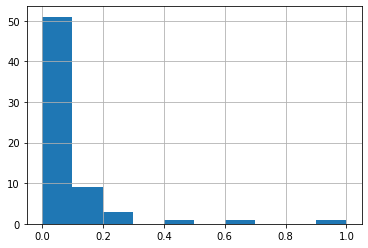

In [696]:
countries_data["Population"].hist()
plt.show()

<AxesSubplot:>

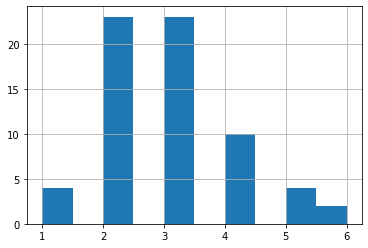

In [697]:
countries_data['Population_cat']=countries_data["Population"]
countries_data["Population_cat"].where(countries_data["Population"] < 0.6, 6, inplace=True)
countries_data["Population_cat"].where((countries_data["Population"] < 0.2) | (countries_data["Population"] >= 0.6), 5, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.2) | (countries_data["Population"] >= 0.3), 5, inplace=True)
countries_data["Population_cat"].where((countries_data["Population"] < 0.08) | (countries_data["Population"] >= 0.2), 4, inplace=True)
countries_data["Population_cat"].where((countries_data["Population"] < 0.015) | (countries_data["Population"] >= 0.08), 3, inplace=True)
countries_data["Population_cat"].where((countries_data["Population"] < 0.001) | (countries_data["Population"] >= 0.015), 2, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.0008) | (countries_data["Population"] >= 0.001), 2, inplace=True)
countries_data["Population_cat"].where(countries_data["Population"] > 0.001, 1, inplace=True)
countries_data['Population_cat'].hist()

* After applying the stratified shuffle split, drop the category feature that was created based on the population.

In [698]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(countries_data, countries_data["Population_cat"]):
    train_set = countries_data.loc[train_index]
    test_set = countries_data.loc[test_index]

for set in (train_set, test_set):
    set.drop(["Population_cat"], axis=1, inplace=True)
    
countries_data.drop('Population_cat',axis='columns', inplace=True)

* The figure below shows how the test and training sets are constructed from the countries_data dataset. It can be clearly seen how the stratified shuffle split allowed the test set to be similar to the original dataset and not biased.

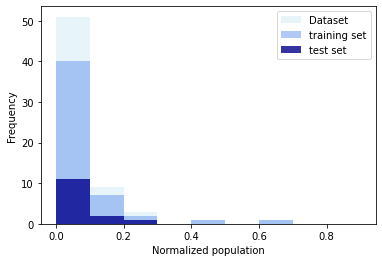

In [699]:
plt.hist(countries_data['Population'], alpha=0.2, color='skyblue',bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.hist(train_set['Population'], alpha=0.5,color='cornflowerblue',bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.hist(test_set['Population'], alpha=0.8,bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],color='darkblue')

plt.legend(["Dataset","training set","test set"])
plt.xlabel("Normalized population")
plt.ylabel("Frequency")
plt.show()

* Copy the training set to analyze it without any worries about ruining it.

In [700]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 56
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  52 non-null     float64
 1   Density                     52 non-null     float64
 2   total_cases                 52 non-null     float64
 3   total_tests                 52 non-null     float64
 4   tests_per_case              52 non-null     float64
 5   extreme_poverty             52 non-null     float64
 6   human_development_index     52 non-null     float64
 7   hospital_beds_per_thousand  52 non-null     float64
 8   reproduction_rate           52 non-null     float64
 9   total_deaths                52 non-null     float64
 10  positive_rate               52 non-null     float64
 11  Tourism                     52 non-null     float64
 12  Latitude                    52 non-null     float64
 13  Longitude                   52 non-nu

In [701]:
training_set_mortality = train_set.drop(['total_cases', 'total_tests', 'tests_per_case', 'reproduction_rate', 'total_deaths', 'positive_rate'],axis='columns', inplace=False)
training_target_mortality = train_set['mortality_rate'].copy()

test_target_mortality = test_set["mortality_rate"].copy()
test_set_mortality = test_set.drop(['mortality_rate', 'total_cases', 'total_tests', 'tests_per_case', 'reproduction_rate', 'total_deaths', 'positive_rate'], axis='columns', inplace=False)

In [702]:
training_set_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 56
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  52 non-null     float64
 1   Density                     52 non-null     float64
 2   extreme_poverty             52 non-null     float64
 3   human_development_index     52 non-null     float64
 4   hospital_beds_per_thousand  52 non-null     float64
 5   Tourism                     52 non-null     float64
 6   Latitude                    52 non-null     float64
 7   Longitude                   52 non-null     float64
 8   GDP 2018                    52 non-null     float64
 9   HF score 2017               52 non-null     float64
 10  literacy rate               52 non-null     float64
 11  time for lockdown           52 non-null     float64
 12  Dry                         52 non-null     int32  
 13  Wet tropical                52 non-nu

In [703]:
countriesData = train_set.copy()
test_target = test_set["time for spread"].copy()
test_set = test_set.drop(['time for spread'], axis='columns', inplace=False)

training_target = train_set['time for spread'].copy()


In [704]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 56
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  52 non-null     float64
 1   Density                     52 non-null     float64
 2   total_cases                 52 non-null     float64
 3   total_tests                 52 non-null     float64
 4   tests_per_case              52 non-null     float64
 5   extreme_poverty             52 non-null     float64
 6   human_development_index     52 non-null     float64
 7   hospital_beds_per_thousand  52 non-null     float64
 8   reproduction_rate           52 non-null     float64
 9   total_deaths                52 non-null     float64
 10  positive_rate               52 non-null     float64
 11  Tourism                     52 non-null     float64
 12  Latitude                    52 non-null     float64
 13  Longitude                   52 non-nu

### Analyzing Correlations

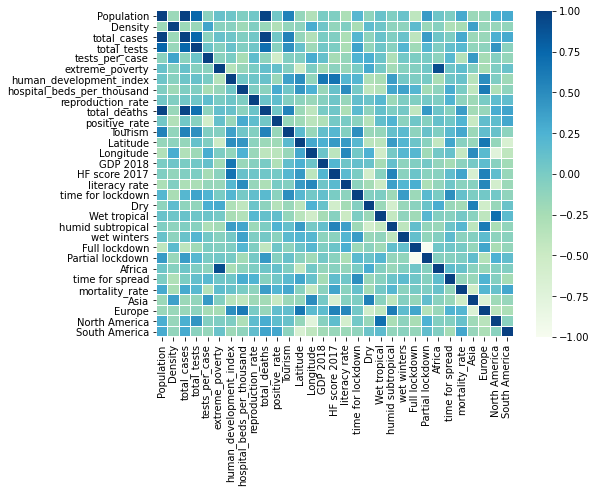

In [705]:
countriesData = countriesData.reset_index()
countriesData.drop('index',axis='columns', inplace=True)

corr_matrix = countriesData.corr()
fig, ax = plt.subplots(figsize=(8,6))         # Sample figsize in inches 
heat_map = sns.heatmap(corr_matrix, linewidths=0.01,ax=ax, cmap='GnBu')

In [706]:
corr_matrix["time for spread"].sort_values(ascending=False)

time for spread               1.000000
time for lockdown             0.480225
Latitude                      0.329743
hospital_beds_per_thousand    0.289039
Europe                        0.241923
reproduction_rate             0.234519
tests_per_case                0.193370
Tourism                       0.176121
wet winters                   0.166595
Africa                        0.154393
HF score 2017                 0.141869
total_tests                   0.125238
Longitude                     0.111422
humid subtropical             0.082365
Full lockdown                 0.060000
literacy rate                 0.058736
extreme_poverty               0.058010
human_development_index       0.055379
positive_rate                 0.053735
total_cases                  -0.014171
Population                   -0.015401
North America                -0.047335
Partial lockdown             -0.060000
total_deaths                 -0.067937
Wet tropical                 -0.074877
mortality_rate           

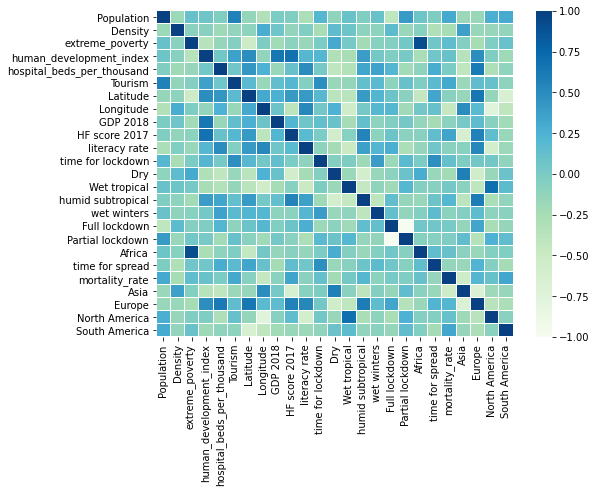

In [707]:
corr_matrix_mortality = training_set_mortality.corr()
fig, ax = plt.subplots(figsize=(8,6))         # Sample figsize in inches 
heat_map = sns.heatmap(corr_matrix_mortality, linewidths=0.01,ax=ax, cmap='GnBu')

In [708]:
corr_matrix_mortality["mortality_rate"].sort_values(ascending=False)

mortality_rate                1.000000
HF score 2017                 0.343204
South America                 0.321050
Tourism                       0.314370
Population                    0.307433
Europe                        0.214534
humid subtropical             0.209343
extreme_poverty               0.155622
time for lockdown             0.121204
North America                 0.115449
Africa                        0.105973
human_development_index       0.098584
Wet tropical                  0.035645
Full lockdown                 0.017360
hospital_beds_per_thousand    0.000563
Partial lockdown             -0.017360
Latitude                     -0.073759
literacy rate                -0.081233
wet winters                  -0.089888
GDP 2018                     -0.091755
time for spread              -0.138830
Dry                          -0.222288
Density                      -0.242659
Longitude                    -0.445391
Asia                         -0.518521
Name: mortality_rate, dty

### Taking a look at the data before fitting it in a ML model

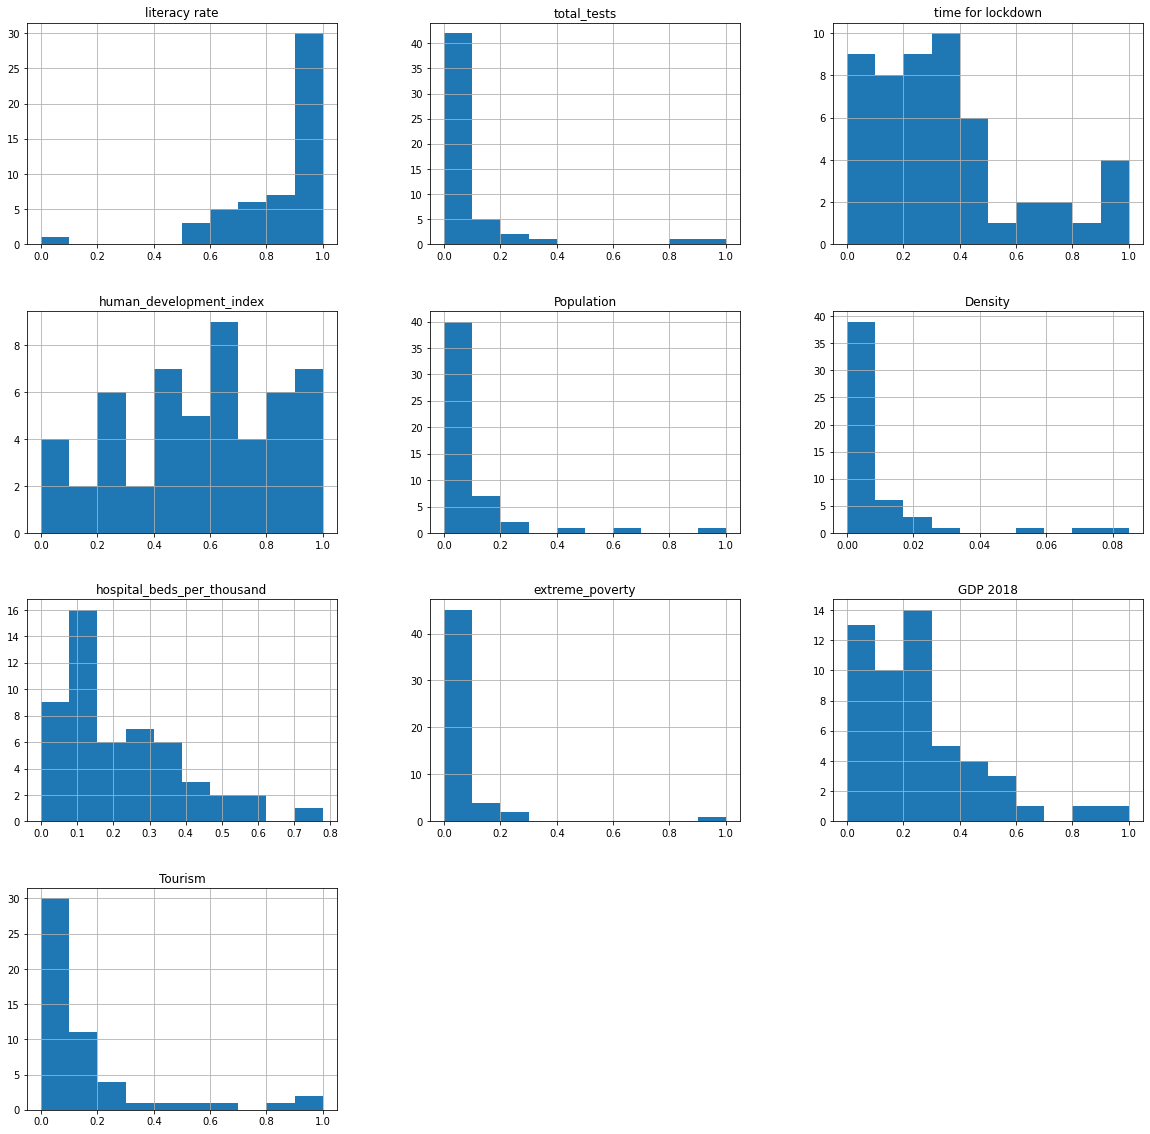

In [709]:
%matplotlib inline 
countriesData[{"GDP 2018","Tourism","hospital_beds_per_thousand","time for lockdown","total_tests","Population","human_development_index","Density","literacy rate","extreme_poverty"}].hist(bins=10, figsize=(20,20))
plt.show()

### Selecting and Training Models

*Not all models were mentioned in the paper, only the ones that gave good results in the test set.*

In [710]:
#training_target=countriesData['time for spread']
training_data=countriesData.drop('time for spread',axis='columns', inplace=False)

#training_target_mortality = countriesData['mortality_rate']
training_data_mortality = training_set_mortality.drop('mortality_rate',axis='columns', inplace=False)

### Linear Regression

First, we used linear regression model to train our data. 

Grid search was used to find the best hyperparameter, which was n_jobs. The results was n_jobs=1, the default value.

#### Spreading Speed:

In [711]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

lin_reg = LinearRegression()
lin_reg.fit(training_data, training_target)

lin_predictions = lin_reg.predict(training_data)

param_grid = [{'n_jobs': [1, 5, 10,20,100]}]

grid_search = GridSearchCV(lin_reg, param_grid, cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(training_data, training_target)
print(grid_search.best_params_)

{'n_jobs': 1}


##### Mortality Rate:

In [712]:
#lin_reg_mortality = LinearRegression()
#lin_reg_mortality.fit(training_data_mortality, training_target_mortality)
#
#lin_predictions_mortality = lin_reg_mortality.predict(training_data_mortality)
#
#param_grid = [{'n_jobs': [1, 5, 10,20,100]}]
#
#grid_search = GridSearchCV(lin_reg, param_grid, cv=5,scoring='neg_mean_absolute_error')
#grid_search.fit(training_data, training_target)
#print(grid_search.best_params_)

There are different metrics that can be used to quantify the quality of our predictions. 

In [713]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,lin_predictions))

from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,lin_predictions)))

from sklearn.metrics import mean_squared_log_error
print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,lin_predictions)))

from sklearn.metrics import median_absolute_error
print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,lin_predictions))

Mean Absolute Error (MAE)		: 16.741460009025044
Root Mean Squared Error (RMSE)		: 22.30388059426188
Root Mean Squared Log Error (RMSLE)	: 0.09578647194995084
Median Absolute Error (MAE)		: 12.987458379397026


In [714]:
#print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target_mortality, lin_predictions_mortality))
#print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target_mortality, lin_predictions_mortality))

Here we can compare between our predictions and some actual targets. 

In [715]:
some_data = training_data.iloc[:5]
some_labels = training_target.iloc[:5]
print("Predictions:\t", lin_reg.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [308.         261.79946734 259.23661591 202.88604873 161.33260635]
Labels:		 [308.0, 243.0, 257.0, 223.0, 141.0]


Cross Validation

In [716]:
def display_scores(scores):
    print("Scores\t:", scores)
    print("Mean\t:", scores.mean())
    print("Standard deviation:", scores.std())

lin_scores = cross_val_score(lin_reg, training_data, training_target,scoring="neg_mean_absolute_error", cv=10)
lin_scores = -lin_scores

display_scores(lin_scores)

Scores	: [124.76830621  24.39259249  17.99943256  54.02362522  54.39241494
  67.58991974  30.35353646 125.54567097  37.01939534  47.47683945]
Mean	: 58.35617333937849
Standard deviation: 36.31074418912507


### Ridge Regression

In [717]:
from sklearn.linear_model import Ridge

Ridge_reg = Ridge(alpha=0.5,tol=0.001)
Ridge_reg.fit(training_data,training_target)

Ridge_predictions = Ridge_reg.predict(training_data)

In [718]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,Ridge_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,Ridge_predictions)))

print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,Ridge_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,Ridge_predictions))

Mean Absolute Error (MAE)		: 24.588145497368444
Root Mean Squared Error (RMSE)		: 34.05801260777785
Root Mean Squared Log Error (RMSLE)	: 0.17285704157301432
Median Absolute Error (MAE)		: 18.602009996107583


In [719]:
#param_grid_Ridge = [{'alpha':[0.5,1,2,3,4],
#                     'tol':[0.001,0.0001,0.00001]}]
#
#grid_search_Ridge = GridSearchCV(Ridge_reg, param_grid_Ridge, cv=10,scoring='neg_mean_absolute_error')
#grid_search_Ridge.fit(training_data, training_target)
#print(grid_search_Ridge.best_params_)

In [720]:
#Ridge_scores = cross_val_score(Ridge_reg, training_data, training_target,scoring="neg_root_mean_squared_error", cv=10)
#Ridge_scores = -Ridge_scores
#display_scores(Ridge_scores)

### Lasso Regression

In [721]:
from sklearn import linear_model

Lasso_reg = linear_model.Lasso(alpha= 0.5, max_iter= 20000, selection='random',tol= 0.0001)
Lasso_reg.fit(training_data,training_target)

Lasso_predictions = Lasso_reg.predict(training_data)

In [722]:
#param_grid_Lasso = [{'alpha': [0.1,0.7,0.5,0.2],
#                     'max_iter': [1000,15000,20000,2500,10000],
#                     'tol': [0.002,0.005,0.001,0.0065],
#                     'selection': ['random']}]
#
#grid_search_Lasso = GridSearchCV(Lasso_reg, param_grid_Lasso, cv=10,scoring='neg_mean_absolute_error')
#grid_search_Lasso.fit(training_data, training_target)
#print(grid_search_Lasso.best_params_)

In [723]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,Lasso_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,Lasso_predictions)))

print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,Lasso_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,Lasso_predictions))

Mean Absolute Error (MAE)		: 25.58797690644114
Root Mean Squared Error (RMSE)		: 34.23431700757054
Root Mean Squared Log Error (RMSLE)	: 0.1728164882193672
Median Absolute Error (MAE)		: 18.18612683214738


In [724]:
print("Predictions:\t", Lasso_reg.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [282.0000935  259.74466978 291.81341072 195.07694175 205.17479153]
Labels:		 [308.0, 243.0, 257.0, 223.0, 141.0]


In [725]:
#Lasso_scores = cross_val_score(Lasso_reg, training_data, training_target,scoring="neg_root_mean_squared_error", cv=10)
#Lasso_scores = -Lasso_scores
#display_scores(Lasso_scores)

### SGD

SGD was not included in the paper as we focused more on the comparison between different SVM kernels and different Regularized Linear Regression models 

In [726]:
from sklearn.linear_model import SGDRegressor

SGD_reg=linear_model.SGDRegressor(eta0=0.01,alpha= 0.0001, epsilon=0.2, max_iter= 10000000, tol= 0.001)
SGD_reg.fit(training_data,training_target)

SGD_predictions = SGD_reg.predict(training_data)

In [727]:
#param_grid_SGD = [{'alpha':[0.1,0.01,0.0001,0.00001],
#                   'max_iter':[1000000,10000000],
#                   'tol':[0.01,0.001,0.0001],
#                   'epsilon':[0.1,0.2,0.3,0.4,0.5],
#                   'eta0':[0.1,0.01,0.05]}]
#
#   
#
#grid_search_SGD = GridSearchCV(SGD_reg, param_grid_SGD, cv=5,scoring='neg_mean_absolute_error')
#grid_search_SGD.fit(training_data, training_target)
#print(grid_search_SGD.best_params_)

In [728]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SGD_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SGD_predictions)))

#print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,SGD_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SGD_predictions))

Mean Absolute Error (MAE)		: 24.31805342992312
Root Mean Squared Error (RMSE)		: 33.82421385717241
Median Absolute Error (MAE)		: 17.96604261623193


In [729]:
print("Predictions:\t", SGD_reg.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [285.28542593 254.43077374 294.51459494 205.02719027 201.75991614]
Labels:		 [308.0, 243.0, 257.0, 223.0, 141.0]


In [730]:
#SGD_scores = cross_val_score(SGD_reg, training_data, training_target,scoring="neg_mean_absolute_error", cv=10)
#SGD_scores = -SGD_scores
#
#display_scores(SGD_scores)

### Elastics Net

In [731]:
from sklearn.linear_model import ElasticNet

Elastic_reg = ElasticNet(l1_ratio=1,tol=0.00001,max_iter=1000)
Elastic_reg.fit(training_data, training_target)

Elastic_predictions = Elastic_reg.predict(training_data)

In [732]:
#param_grid_Elastic = [{'l1_ratio':[1,0.8,0.6,0.4],
#                       'max_iter':[1000,10000,100000],
#                       'tol':[0.001,0.00001,0.0001]}]
#   
#
#grid_search_Elastic = GridSearchCV(Elastic_reg, param_grid_Elastic, cv=5,scoring='neg_mean_absolute_error')
#grid_search_Elastic.fit(training_data, training_target)
#print(grid_search_Elastic.best_params_)

In [733]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,Elastic_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,Elastic_predictions)))

print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,Elastic_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,Elastic_predictions))

Mean Absolute Error (MAE)		: 28.61458599710039
Root Mean Squared Error (RMSE)		: 37.87342076329784
Root Mean Squared Log Error (RMSLE)	: 0.1920594296446072
Median Absolute Error (MAE)		: 21.81220590123499


In [734]:
#Elastic_scores = cross_val_score(Elastic_reg, training_data, training_target,scoring="neg_root_mean_squared_error", cv=10)
#Elastic_scores = -Elastic_scores
#
#display_scores(Elastic_scores)

### RBF SVM

In [735]:
from sklearn.svm import SVR

SVM_rbf_reg = SVR(kernel='rbf',C=50, epsilon= 0.3, tol= 0.0001)
SVM_rbf_reg.fit(training_data, training_target)

SVM_rbf_predictions = SVM_rbf_reg.predict(training_data)

print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SVM_rbf_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SVM_rbf_predictions)))

print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,SVM_rbf_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SVM_rbf_predictions))

Mean Absolute Error (MAE)		: 24.498225810424916
Root Mean Squared Error (RMSE)		: 41.58549725099893
Root Mean Squared Log Error (RMSLE)	: 0.22078182876198266
Median Absolute Error (MAE)		: 11.78904875722074


### Linear SVM

SVR with kernel 'linear' was used instead of LinearSVR as our dataset is small

In [736]:
from sklearn.svm import SVR

SVM_reg = SVR(kernel='linear',C=20, epsilon= 0.3, tol= 0.0001)
SVM_reg.fit(training_data, training_target)

SVM_predictions = SVM_reg.predict(training_data)

In [737]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SVM_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SVM_predictions)))

print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,SVM_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SVM_predictions
                                                              ))

Mean Absolute Error (MAE)		: 26.39681585222892
Root Mean Squared Error (RMSE)		: 41.88904848284787
Root Mean Squared Log Error (RMSLE)	: 0.2157775802162796
Median Absolute Error (MAE)		: 18.380278638568214


### Polynomial SVM

In [738]:
from sklearn.svm import SVR

SVM_poly_reg = SVR(kernel='poly',C=50, degree= 2, epsilon= 0.3, tol= 0.0001)
SVM_poly_reg.fit(training_data, training_target)

SVM_poly_predictions = SVM_poly_reg.predict(training_data)

In [739]:
#param_grid_SVM_poly = [{'C':[10,20,5,40,50],
#                     'degree':[2,3,4,5],
#                     'tol':[0.01,0.001,0.0001],
#                     'epsilon':[0.3,0.1,0.5]
#                      }]
#   
#
#grid_search_SVM_poly = GridSearchCV(SVM_poly_reg, param_grid_SVM_poly, cv=10,scoring='neg_mean_absolute_error')
#grid_search_SVM_poly.fit(training_data, training_target)
#print(grid_search_SVM_poly.best_params_)

In [740]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SVM_poly_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SVM_poly_predictions)))

print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,SVM_poly_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SVM_poly_predictions))

Mean Absolute Error (MAE)		: 20.824884640680757
Root Mean Squared Error (RMSE)		: 37.35946362832833
Root Mean Squared Log Error (RMSLE)	: 0.20341615843588143
Median Absolute Error (MAE)		: 4.07994554884732


### Ensemble

Ensemble method was not included in the paper as it did not give any improvement regarding our predictions

In [741]:
ensemble_test=(lin_predictions+Lasso_predictions+Ridge_predictions+SVM_predictions+SVM_poly_predictions+Elastic_predictions+SGD_predictions)/7

print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,ensemble_test))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,ensemble_test)))

#print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,ensemble_test)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,ensemble_test))

Mean Absolute Error (MAE)		: 22.80433103055228
Root Mean Squared Error (RMSE)		: 32.446962528120665
Median Absolute Error (MAE)		: 16.60445112179002


In [742]:
ensemble_median = np.stack([lin_predictions, Lasso_predictions, Ridge_predictions, SVM_predictions, SVM_poly_predictions, Elastic_predictions, SGD_predictions])
ensemble_median=np.median(ensemble_median, axis = 0)

print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,ensemble_median))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,ensemble_median)))

print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,ensemble_median)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,ensemble_median))

Mean Absolute Error (MAE)		: 23.71266185662045
Root Mean Squared Error (RMSE)		: 33.283810739529
Root Mean Squared Log Error (RMSLE)	: 0.17040221689387577
Median Absolute Error (MAE)		: 16.481025780774843


In [743]:
Accuracy_train_MAE_lin_reg = 100-100*(mean_absolute_error(training_target, lin_predictions)/training_target.mean())
Accuracy_train_medAE_lin_reg = 100-100*(median_absolute_error(training_target, lin_predictions)/training_target.mean())

Accuracy_train_MAE_Lasso = 100-100*(mean_absolute_error(training_target, Lasso_predictions)/training_target.mean())
Accuracy_train_medAE_Lasso = 100-100*(median_absolute_error(training_target, Lasso_predictions)/training_target.mean())

Accuracy_train_MAE_Ridge = 100-100*(mean_absolute_error(training_target, Ridge_predictions)/training_target.mean())
Accuracy_train_medAE_Ridge = 100-100*(median_absolute_error(training_target, Ridge_predictions)/training_target.mean())

Accuracy_train_MAE_Net = 100-100*(mean_absolute_error(training_target, Elastic_predictions)/training_target.mean())
Accuracy_train_medAE_Net = 100-100*(median_absolute_error(training_target, Elastic_predictions)/training_target.mean())

Accuracy_train_MAE_Poly = 100-100*(mean_absolute_error(training_target, SVM_poly_predictions)/training_target.mean())
Accuracy_train_medAE_Poly = 100-100*(median_absolute_error(training_target, SVM_poly_predictions)/training_target.mean())

Accuracy_train_MAE_SVM_lin = 100-100*(mean_absolute_error(training_target, SVM_predictions)/training_target.mean())
Accuracy_train_medAE_SVM_lin = 100-100*(median_absolute_error(training_target, SVM_predictions)/training_target.mean())

Accuracy_train_MAE_RBF = 100-100*(mean_absolute_error(training_target, SVM_rbf_predictions)/training_target.mean())
Accuracy_train_medAE_RBF = 100-100*(median_absolute_error(training_target, SVM_rbf_predictions)/training_target.mean())

In [744]:
print("Lin reg MAE:", Accuracy_train_MAE_lin_reg)
print("Lin reg MedAE:",Accuracy_train_medAE_lin_reg,"\n")
print("Lasso MAE:",Accuracy_train_MAE_Lasso)
print("Lasso MedAE:",Accuracy_train_medAE_Lasso,"\n" )
print("Ridge MAE:",Accuracy_train_MAE_Ridge )
print("Ridge MedAE:",Accuracy_train_medAE_Ridge,"\n" )
print("Elastic MAE:",Accuracy_train_MAE_Net )
print("Elastic MedAE:",Accuracy_train_medAE_Net,"\n" )
print("SVM Poly MAE:",Accuracy_train_MAE_Poly )
print("SVM Poly MedAE:",Accuracy_train_medAE_Poly,"\n" )
print("SVM Lin MAE:",Accuracy_train_MAE_SVM_lin) 
print("SVM Lin MedAE:",Accuracy_train_medAE_SVM_lin,"\n") 
print("SVM RBF MAE:",Accuracy_train_MAE_RBF )
print("SVM RBF MedAE:",Accuracy_train_medAE_RBF )

Lin reg MAE: 93.28999598836671
Lin reg MedAE: 94.79460585996111 

Lasso MAE: 89.74429783308972
Lasso MedAE: 92.71097120956017 

Ridge MAE: 90.14503186478218
Ridge MedAE: 92.54428457069837 

Elastic MAE: 88.53122805727439
Elastic MedAE: 91.25763290531664 

SVM Poly MAE: 91.65335284942655
SVM Poly MedAE: 98.36475128302713 

SVM Lin MAE: 89.42011388688219
SVM Lin MedAE: 92.63315485428127 

SVM RBF MAE: 90.18107181946897
SVM RBF MedAE: 95.27493035782736


## Testing

After training our models let's finally test it on data that it has never seen before.


Mean Absolute Error was chosen as the preformance measure. Mean root square error was not recommended as it's sensitive to outliers, which occur in our case.  

The procedure is simple. Just use the predictors with the test set.

In [745]:
#test_target = test_set["time for spread"].copy()
#test_set=test_set.drop("time for spread", axis='columns',inplace=False)

test_target=test_target.reset_index()
test_target.drop('index',inplace=True,axis='columns')

Predict the test set by every model that we trained

In [746]:
final_predictions = SVM_poly_reg.predict(test_set)#SVM poly
final_predictions2 = SVM_reg.predict(test_set)#SVM linear
final_predictions11 = SVM_rbf_reg.predict(test_set)#SVM rbf

final_predictions3 = lin_reg.predict(test_set)#linear regression
final_predictions4 = Lasso_reg.predict(test_set)#lasso
final_predictions5 = Ridge_reg.predict(test_set)#ridge
final_predictions6 = Elastic_reg.predict(test_set)#elastic net

final_predictions7 = SGD_reg.predict(test_set)#SGD

Convert to pandas dataframe to apply error functions

In [747]:
final_predictions=pd.DataFrame(data=final_predictions,columns=['time for spread'])#SVM poly       
final_predictions2=pd.DataFrame(data=final_predictions2,columns=['time for spread'])#SVM          
final_predictions11=pd.DataFrame(data=final_predictions11,columns=['time for spread'])#SVM rbf        

final_predictions3=pd.DataFrame(data=final_predictions3,columns=['time for spread'])#linear           
final_predictions4=pd.DataFrame(data=final_predictions4,columns=['time for spread'])#Lasso         
final_predictions5=pd.DataFrame(data=final_predictions5,columns=['time for spread'])#Ridge           
final_predictions6=pd.DataFrame(data=final_predictions6,columns=['time for spread'])#Elastic net        

final_predictions7=pd.DataFrame(data=final_predictions7,columns=['time for spread'])#SGD           

Find the Mean Absolute Error and the Median Absolute Error of each model.

## MAE

In [748]:
MAE_SVM_poly=mean_absolute_error(test_target,final_predictions)
MAE_SVM_lin=mean_absolute_error(test_target,final_predictions2)
MAE_SVM_RBF=mean_absolute_error(test_target,final_predictions11)

MAE_Lin_reg=mean_absolute_error(test_target,final_predictions3)
MAE_Lasso=mean_absolute_error(test_target,final_predictions4)
MAE_Ridge=mean_absolute_error(test_target,final_predictions5)
MAE_Elastic=mean_absolute_error(test_target,final_predictions6)

MAE_SGD=mean_absolute_error(test_target,final_predictions7)

In [749]:
print("Mean Absolute Error SVM polynomial\t\t:",mean_absolute_error(test_target,final_predictions))
print("Mean Absolute Error SVM\t\t\t\t:",mean_absolute_error(test_target,final_predictions2))
print("Mean Absolute Error SVR rbf\t\t\t:",mean_absolute_error(test_target,final_predictions11))

print("\nMean Absolute Error Linear regression\t\t:",mean_absolute_error(test_target,final_predictions3))
print("Mean Absolute Error Lasso regression\t\t:",mean_absolute_error(test_target,final_predictions4))
print("Mean Absolute Error Ridge regression\t\t:",mean_absolute_error(test_target,final_predictions5))
print("Mean Absolute Error Elastic net\t\t\t:",mean_absolute_error(test_target,final_predictions6))

print("\nMean Absolute Error SGD\t\t\t\t:",mean_absolute_error(test_target,final_predictions7))

Mean Absolute Error SVM polynomial		: 27.450674929908274
Mean Absolute Error SVM				: 30.190326304376452
Mean Absolute Error SVR rbf			: 31.92746252466781

Mean Absolute Error Linear regression		: 77.9217781049789
Mean Absolute Error Lasso regression		: 28.642749783800415
Mean Absolute Error Ridge regression		: 27.03495975020519
Mean Absolute Error Elastic net			: 33.044154151376134

Mean Absolute Error SGD				: 25.26443961353939


In [750]:
test_target.mean()

time for spread    274.642857
dtype: float64

Calculate the accuracy of our predictions. 

$Percentage Error =100* \frac{MAE}{Mean \ Target \ Values}$

$Accuracy = 100 \ – Percentage Error $

In [751]:
Accuracy_SVM_Poly = 100-100*(MAE_SVM_poly/test_target.mean())
Accuracy_SVM_lin = 100-100*(MAE_SVM_lin/test_target.mean())
Accuracy_SVM_RBF = 100-100*(MAE_SVM_RBF/test_target.mean())

Accuracy_Lin_reg = 100-100*(MAE_Lin_reg/test_target.mean())
Accuracy_Lasso   = 100-100*(MAE_Lasso/test_target.mean())
Accuracy_Ridge   = 100-100*(MAE_Ridge/test_target.mean())
Accuracy_Elastic_Net = 100-100*(MAE_Elastic/test_target.mean())

Accuracy_SGD     = 100-100*(MAE_SGD/test_target.mean())

In [752]:
print("Accuracy SVM Poly\t:",Accuracy_SVM_Poly)
print("Accuracy SVM lin\t:",Accuracy_SVM_lin )
print("Accuracy SVM RBF\t:",Accuracy_SVM_RBF )

print("\nAccuracy Lin reg\t:",Accuracy_Lin_reg )
print("Accuracy Lasso\t\t:",Accuracy_Lasso   )
print("Accuracy Ridge\t\t:",Accuracy_Ridge   )
print("Accuracy Elastic Net\t:",Accuracy_Elastic_Net)

print("\nAccuracy SGD\t\t:",Accuracy_SGD)

Accuracy SVM Poly	: time for spread    90.004956
dtype: float64
Accuracy SVM lin	: time for spread    89.007423
dtype: float64
Accuracy SVM RBF	: time for spread    88.374916
dtype: float64

Accuracy Lin reg	: time for spread    71.627961
dtype: float64
Accuracy Lasso		: time for spread    89.57091
dtype: float64
Accuracy Ridge		: time for spread    90.156322
dtype: float64
Accuracy Elastic Net	: time for spread    87.968318
dtype: float64

Accuracy SGD		: time for spread    90.800984
dtype: float64


Text(0, 0.5, 'Accuracy')

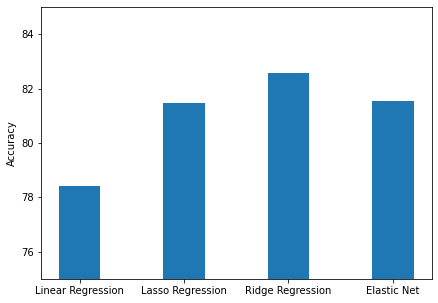

In [753]:
names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net']
#values = [Accuracy_Lasso, Accuracy_Ridge, Accuracy_Elastic_Net] error so inserted the values manually
#values = [83.207609, 83.700748, 82.784986]  old

values = [78.411748, 81.463779, 82.560484, 81.531555]

fig, ax = plt.subplots(figsize=(7,5))

plt.bar(names, values, width= 0.4)

ax.yaxis.set_minor_formatter(plt.ScalarFormatter())
plt.ylim(bottom=75, top=85)

plt.ylabel("Accuracy")
#plt.xlabel("Model")

Text(0, 0.5, 'Accuracy')

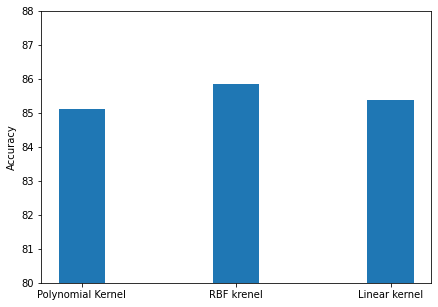

In [754]:
names_SVM = ['Polynomial Kernel', 'RBF krenel', 'Linear kernel']
#values_SVM = [Accuracy_SVM_Poly, Accuracy_SVM_RBF, Accuracy_SVM_lin]
#values_SVM = [86.202998, 85.85229, 84.80567] old
values_SVM = [85.116036, 85.847255, 85.391127]


figSVM, axSVM = plt.subplots(figsize=(7,5))

plt.bar(names_SVM, values_SVM, width= 0.3)

axSVM.yaxis.set_minor_formatter(plt.ScalarFormatter())

plt.ylim(bottom=80, top=88)
plt.ylabel("Accuracy")

## Median

In [755]:
Med_SVM_poly=median_absolute_error(test_target,final_predictions)    
Med_SVM_lin =median_absolute_error(test_target,final_predictions2)       
Med_SVM_RBF =median_absolute_error(test_target,final_predictions11) 

Med_Lin_reg =median_absolute_error(test_target,final_predictions3)
Med_Lasso   =median_absolute_error(test_target,final_predictions4)
Med_Ridge   =median_absolute_error(test_target,final_predictions5)
Med_Elastic =median_absolute_error(test_target,final_predictions6) 

Med_SGD     =median_absolute_error(test_target,final_predictions7)          

In [756]:
print("Median Absolute Error SVM polynomial\t\t:",Med_SVM_poly)    
print("Median Absolute Error SVM\t\t\t:",Med_SVM_lin)   
print("Median Absolute Error SVR rbf\t\t\t:",Med_SVM_RBF)   

print("\nMedian Absolute Error Linear regression\t\t:",Med_Lin_reg) 
print("Median Absolute Error Lasso regression\t\t:",Med_Lasso) 
print("Median Absolute Error Ridge regression\t\t:",Med_Ridge)  
print("Median Absolute Error Elastic net\t\t:",Med_Elastic)   

print("\nMedian Absolute Error SGD\t\t\t:",Med_SGD)               

Median Absolute Error SVM polynomial		: 20.82757038703383
Median Absolute Error SVM			: 28.8123817563104
Median Absolute Error SVR rbf			: 32.516906111222

Median Absolute Error Linear regression		: 35.15341464304774
Median Absolute Error Lasso regression		: 23.168312282760382
Median Absolute Error Ridge regression		: 21.454481595094464
Median Absolute Error Elastic net		: 32.49551544055291

Median Absolute Error SGD			: 18.763885109923535


In [757]:
Accuracy_SVM_Poly_median = 100-100*(Med_SVM_poly/test_target.mean())
Accuracy_SVM_lin_median= 100-100*(Med_SVM_lin/test_target.mean())
Accuracy_SVM_RBF_median= 100-100*(Med_SVM_RBF/test_target.mean())

Accuracy_Lin_reg_median= 100-100*(Med_Lin_reg/test_target.mean())
Accuracy_Lasso_median= 100-100*(Med_Lasso/test_target.mean())
Accuracy_Ridge_median= 100-100*(Med_Ridge/test_target.mean())
Accuracy_Elastic_Net_median = 100-100*(Med_Elastic/test_target.mean())

Accuracy_SGD_median     = 100-100*(Med_SGD/test_target.mean())

print("Accuracy SVM Poly\t:",Accuracy_SVM_Poly_median)
print("Accuracy SVM lin\t:",Accuracy_SVM_lin_median )
print("Accuracy SVM RBF\t:",Accuracy_SVM_RBF_median )

print("\nAccuracy Lin reg\t:",Accuracy_Lin_reg_median )
print("Accuracy Lasso\t\t:",Accuracy_Lasso_median   )
print("Accuracy Ridge\t\t:",Accuracy_Ridge_median   )
print("Accuracy Elastic Net\t:",Accuracy_Elastic_Net_median)

print("\nAccuracy SGD\t\t:",Accuracy_SGD_median)

Accuracy SVM Poly	: time for spread    92.416489
dtype: float64
Accuracy SVM lin	: time for spread    89.509146
dtype: float64
Accuracy SVM RBF	: time for spread    88.160294
dtype: float64

Accuracy Lin reg	: time for spread    87.200317
dtype: float64
Accuracy Lasso		: time for spread    91.564204
dtype: float64
Accuracy Ridge		: time for spread    92.188225
dtype: float64
Accuracy Elastic Net	: time for spread    88.168083
dtype: float64

Accuracy SGD		: time for spread    93.167896
dtype: float64


Text(0, 0.5, 'Accuracy')

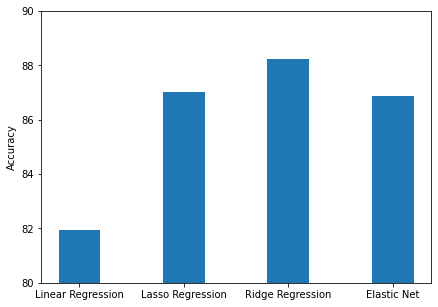

In [758]:
names_med = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net']
#values = [Accuracy_Lasso, Accuracy_Ridge, Accuracy_Elastic_Net] error so inserted the values manually
#values_med = [85.561701, 83.755405, 85.745758] old
values_med = [81.953551, 87.028402, 88.233752, 86.860861]

#plt.figure()
fig_med, ax_med = plt.subplots(figsize=(7,5))

plt.bar(names_med, values_med, width= 0.4)

ax_med.yaxis.set_minor_formatter(plt.ScalarFormatter())
plt.ylim(bottom=80, top=90)
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

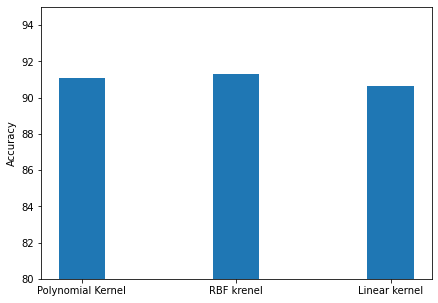

In [759]:
names_SVM_med = ['Polynomial Kernel', 'RBF krenel', 'Linear kernel']
#values_SVM = [Accuracy_SVM_Poly, Accuracy_SVM_RBF, Accuracy_SVM_lin]
#values_SVM_med = [88.746421, 89.111174, 88.57851]
values_SVM_med = [91.087562, 91.314265, 90.637946]

#plt.figure()
figSVM_med, axSVM_med = plt.subplots(figsize=(7,5))

plt.bar(names_SVM_med, values_SVM_med, width= 0.3)

axSVM_med.yaxis.set_minor_formatter(plt.ScalarFormatter())

plt.ylim(bottom=80, top=95)
plt.ylabel("Accuracy")

# ----------------------------------------------------------------------------------------------------------
## Training

In [760]:
#training_data_mortality.drop('mortality_rate', inplace=True, axis='columns')

In [761]:
model = LinearRegression()

model.fit(training_data, training_target)
model_predictions = model.predict(training_data)

Accuracy_MAE = 100-100*(mean_absolute_error(training_target, model_predictions)/training_target.mean())
Accuracy_medAE = 100-100*(median_absolute_error(training_target, model_predictions)/training_target.mean())

model_mortality =LinearRegression()

model_mortality.fit(training_data_mortality, training_target_mortality)
model_predictions_mortality = model_mortality.predict(training_data_mortality)

Accuracy_mortality_MAE = 100-100*(mean_absolute_error(training_target_mortality, model_predictions_mortality)/training_target_mortality.mean())
Accuracy_mortality_medAE = 100-100*(median_absolute_error(training_target_mortality, model_predictions_mortality)/training_target_mortality.mean())

print("(MAE)\t\t:", Accuracy_MAE)
print("(medAE)\t\t:", Accuracy_medAE)

print("mortality (MAE)\t\t:", Accuracy_mortality_MAE)
print("mortality (medAE)\t\t:", Accuracy_mortality_medAE)

(MAE)		: 93.28999598836671
(medAE)		: 94.79460585996111
mortality (MAE)		: 71.84400998173416
mortality (medAE)		: 77.26590451488661


## Testing

In [762]:
#test_set_mortality.drop('time for spread', inplace=True, axis='columns')

In [763]:
test_set_mortality = test_set_mortality.reset_index()
test_set_mortality.drop('index',inplace=True,axis='columns')

test_target_mortality = test_target_mortality.reset_index()
test_target_mortality.drop('index',inplace=True,axis='columns')

In [764]:
p = model.predict(test_set)
FP = pd.DataFrame(data=p, columns=['time for spread']) 
Emae = mean_absolute_error(test_target, FP)
Amae = 100-100*(Emae/test_target.mean())
Emedae = median_absolute_error(test_target, FP)
Amedae = 100-100*(Emedae/test_target.mean())

pm = model_mortality.predict(test_set_mortality)
FPm = pd.DataFrame(data=pm, columns=['mortality_rate']) 
Emaem = mean_absolute_error(test_target_mortality, FPm)
Amaem = 100-100*(Emaem/test_target_mortality.mean())
Emedaem = median_absolute_error(test_target_mortality, FPm)
Amedaem = 100-100*(Emedaem/test_target_mortality.mean())

print("Accuracy MAE: ", Amae)
print("Accuracy MedAE: ", Amedae)
print("Accuracy mortality MAE: ", Amaem)
print("Accuracy mortality MedAE: ", Amedaem)

Accuracy MAE:  time for spread    71.627961
dtype: float64
Accuracy MedAE:  time for spread    87.200317
dtype: float64
Accuracy mortality MAE:  mortality_rate    52.792119
dtype: float64
Accuracy mortality MedAE:  mortality_rate    53.929293
dtype: float64


In [765]:
model_mortality.predict(test_set_mortality)

array([ 0.01379615,  0.04679334,  0.01892484,  0.02344178,  0.01730351,
        0.02275614,  0.01965654,  0.01751503,  0.03746323,  0.02831801,
        0.00883681,  0.01081959,  0.01800215, -0.01054575])

In [766]:
test_target_mortality

,mortality_rate
0,0.020337
1,0.029606
2,0.008292
3,0.028491
4,0.009143
5,0.019069
6,0.014817
7,0.021681
8,0.027077
9,0.043675
